In [1]:
import nltk
import numpy as np
import pandas as pd
import random
import re
from nltk.corpus import stopwords
from nltk.book import *
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [3]:
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

In [91]:
df = pd.read_csv('Covid_19_tweets_train.csv',encoding='latin1')
encoding = {'Extremely Negative': 'Negative',
            'Extremely Positive': 'Positive'
           }
df['Sentiment'].replace(encoding, inplace=True) #less label
df["sentiment"] = LabelEncoder().fit_transform(df["Sentiment"])
#display(df[["Sentiment", "sentiment"]].head(5))

In [92]:
df['CleanTweet'] = df['OriginalTweet'].copy()
#display(df.head(5))


In [51]:
def before_lowercase(tweet):
    tweet = re.sub(r" usa ", " America ", tweet)
    tweet = re.sub(r" USA ", " America ", tweet)
    tweet = re.sub(r" u s ", " America ", tweet)
    tweet = re.sub(r" uk ", " England ", tweet)
    tweet = re.sub(r" UK ", " England ", tweet)
    tweet = re.sub(r"USAgov", "America government", tweet)
    tweet = re.sub(r"the US", "America", tweet)
    tweet=tweet.lower()
    tweet = re.sub(r"coronavirus", " covid ", tweet)
    tweet = re.sub(r"covid19", " covid ", tweet)
    return str(tweet)

In [52]:
df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)
#display(df['CleanTweet'].head(5))

In [53]:
char_list = ["don", "ain", "ain't", "aren", "arent", "aren't", "cannot", "cant", "can't", "couldn", "couldnt", "couldn't", "didn",
               "didn't", "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn", "hasnt", "hasn't", "haven", "haven't", "mightn", "mightn't",
               "isn", "isn't",  "mustn", "mustn't", "needn", "needn't", "nt", "shouldn", "shouldn't",  "wasn", "wasnt", "wasn't", "don't"]

def before_lowercase(tweet0):
    tweet0 =  re.sub(r"|".join(char_list), "not", tweet0) 
    return str(tweet0)

df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)

In [54]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
df['CleanTweet'] = df['CleanTweet'].apply(convert_emojis)
df['CleanTweet'] = df['CleanTweet'].apply(convert_emoticons)

In [55]:
my_stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", 
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce", 
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay", 
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce", 
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", 
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", 
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however", 
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", 
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", 
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob", 
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto", 
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed", 
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", 
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we", 
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+', 
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', 
                '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
                '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', 
                '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', 
                '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']

In [56]:
def remove_swords(text,s_list):
    a=[]
    for s in text.split():
        if s not in my_stopwords:
            a.append(s)
            #remove_swords(text ,my_stopwords)
    return a
b=[]
for t in df['CleanTweet']:
    b.append(remove_swords(t ,my_stopwords))
df['CleanTweet2'] = b
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet2'].apply(combine_text)

In [57]:
def clean(tweet): 
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"luv", "love", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"that\x89Ûªs", "that is", tweet)
    tweet = re.sub(r"you\x89Ûªre", "you are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"can\x89Ûªt", "can not", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"i\x89Ûªd", "i would", tweet)
    
    
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
   
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
  
   
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
   
    tweet = re.sub(r"e-mail", "email", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"quikly", "quickly", tweet)
    
    
    
    tweet = re.sub(r" iPhone ", " phone ", tweet)
    tweet = re.sub(r"\0rs ", " rs ", tweet) 
    
    tweet = re.sub(r"ios", "operating system", tweet)
  
    tweet = re.sub(r"programing", "programming", tweet)
    tweet = re.sub(r"bestfriend", "best friend", tweet)
    
    
    tweet = re.sub(r" J K ", " JK ", tweet)
    tweet = re.sub(r"coronavirus", " covid19", tweet)
    tweet = re.sub(r"covid", " covid19", tweet)
    tweet = re.sub(r"corrona", " covid19 ", tweet)
    tweet = re.sub(r"covid1919", " covid19 ", tweet)
    tweet = re.sub(r"_", "  ", tweet)
    return str(tweet)

In [58]:
df['CleanTweet'] = df['CleanTweet'].apply(clean)

In [59]:
from bs4 import BeautifulSoup
STOPWORDS = set(stopwords.words('english'))

def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

from tqdm import tqdm
preprocessed_tweets = []
# tqdm is for printing the status bar
def remove_bad_words(sentance):
    #print("sent1 : "+sentance)
    text = sentance.lower()
    sentance = re.sub(r'https?://\S+|www\.\S+', r'', sentance) # remove URLS
    sentance = re.sub(r'\@\S+','', sentance) # remove mentions
    sentance = re.sub(r'<.*?>', r'', sentance) # remove HTML
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub(r'\d+', '', sentance).strip() # remove number
    sentance = re.sub(r"[^\w\s\d]","", sentance) # remove pnctuations
    
    #sentance = re.sub(r'#\w+','', sentance) # remove hash
    sentance = re.sub(r"\s+"," ", sentance).strip() # remove space
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    
    #sentance = ' '.join([e.lower() for e in sentance.split() if e.lower() not in STOPWORDS])
    #preprocessed_tweets.append(sentance.strip())
    #print("sent2 : "+sentance)
    return sentance

In [60]:
df['CleanTweet'] = df['CleanTweet'].apply(remove_bad_words)
display(df['CleanTweet'].head(10))

0    gahan httpsSkeptical annoyed undecided uneasy ...
1    advice talk neighbours family exchange phone n...
2    covid australia woolworths elderly disabled de...
3    food stock not only empty please not not panic...
4    me ready supermarket covid outbreak not parano...
5    news region s confirmed covid case out sulliva...
6    cashier grocery store sharing insights covid p...
7    supermarket today not not buy toilet paper reb...
8    covid retail store classroom atlanota not open...
9    corona prevenotionwe stop buy things cash onli...
Name: CleanTweet, dtype: object

In [67]:
df['CleanTweet'] = df['CleanTweet'].apply(word_tokenize)
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]
df['CleanTweet'] = df['CleanTweet'].apply(lemma_wordnet)

0    [gahan, httpsSkeptical, annoyed, undecided, un...
1    [advice, talk, neighbour, family, exchange, ph...
2    [covid, australia, woolworth, elderly, disable...
3    [food, stock, not, only, empty, please, not, n...
4    [me, ready, supermarket, covid, outbreak, not,...
5    [news, region, s, confirmed, covid, case, out,...
6    [cashier, grocery, store, sharing, insight, co...
7    [supermarket, today, not, not, buy, toilet, pa...
8    [covid, retail, store, classroom, atlanota, no...
9    [corona, prevenotionwe, stop, buy, thing, cash...
Name: CleanTweet, dtype: object

In [68]:
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet'].apply(combine_text)
display(df['CleanTweet'].head(10))

0    gahan httpsSkeptical annoyed undecided uneasy ...
1    advice talk neighbour family exchange phone nu...
2    covid australia woolworth elderly disabled ded...
3    food stock not only empty please not not panic...
4    me ready supermarket covid outbreak not parano...
5    news region s confirmed covid case out sulliva...
6    cashier grocery store sharing insight covid pr...
7    supermarket today not not buy toilet paper reb...
8    covid retail store classroom atlanota not open...
9    corona prevenotionwe stop buy thing cash onlin...
Name: CleanTweet, dtype: object

In [111]:
train,test=train_test_split(df, test_size=0.25, random_state=1000)

In [112]:
#BOW
cv = CountVectorizer()
cv.fit(train)
X_train_bow = cv.fit_transform(train['CleanTweet']) #X_train
X_test_bow = train['sentiment'] #Y_train
Y_train_bow = cv.transform(test['CleanTweet']) #X_test
Y_test_bow = test['sentiment'] # Y_test

In [113]:
#DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_bow,train['sentiment'])
preddt = dtclassifier.predict(Y_train_bow)

In [114]:
accuracy= accuracy_score(preddt,Y_test_bow)
print(accuracy)

0.715354713313897


In [108]:
vectorizer = CountVectorizer()
vectorizer.fit(train)
X_train = vectorizer.transform(train['CleanTweet'])
X_test  = vectorizer.transform(test['CleanTweet'])
classifier = LogisticRegression()
classifier.fit(X_train, train['sentiment'])
score = classifier.score(X_test,test['sentiment'])
print("Accuracy:", score)

Accuracy: 0.43566569484936835


In [102]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train_bow, X_test_bow)

train_accuracy = log_reg_mnm.score(X_train_bow, X_test_bow)
test_accuracy = log_reg_mnm.score(Y_train_bow, Y_test_bow)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

C:\Users\Mohamad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.97
Accuracy on Test Data  : 0.82


In [103]:
# 3.2 TF-IDF
vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['CleanTweet'])
X_test_tfidf = train['sentiment'] #
Y_train_tdidf =vectorizer.transform(test['CleanTweet']) #vectorizer.fit_transform


In [104]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None) 
dtclassifier.fit(X_train_tfidf,train['sentiment'])
preddt = dtclassifier.predict(Y_train_tdidf)
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.7157434402332361


In [105]:
# 3.3 Hashing
hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['CleanTweet'])
X_test_hash = train['sentiment']
Y_train_hash = hv.transform(test['CleanTweet'])

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['sentiment']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred) 
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

C:\Users\Mohamad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


                 precision    recall  f1-score   support

Negative Tweets       0.82      0.84      0.83      3860
 Neutral Tweets       0.75      0.66      0.70      1947
Positive Tweets       0.84      0.86      0.85      4483

       accuracy                           0.81     10290
      macro avg       0.80      0.79      0.79     10290
   weighted avg       0.81      0.81      0.81     10290



Text(59.99999999999999, 0.5, 'Actual')

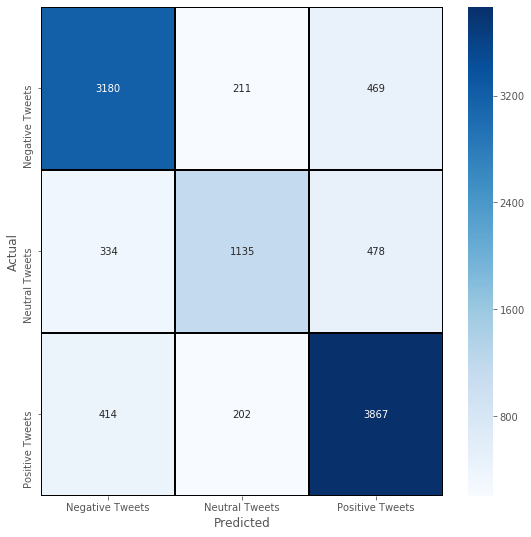

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'], 
            yticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [109]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train_hash, X_test_hash)

train_accuracy = log_reg_mnm.score(X_train_hash, X_test_hash)
test_accuracy = log_reg_mnm.score(Y_train_hash, Y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

C:\Users\Mohamad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.88
Accuracy on Test Data  : 0.80


In [93]:
stop = stopwords.words('english')
def clean(text):
        # specific
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r'http\S+', '', text)
# remove @
    text = re.sub(r'@\w+', '', text)
# remove #
    text = re.sub(r'#\w+', '', text)
    
    text = re.sub(r'<.*?>', '', text)
        
    text = text.split()
        
    text = ' '.join([word.lower() for word in text if word.lower() not in stop])
        
    return text

In [94]:
df['CleanTweet'] = df['CleanTweet'].apply(clean)